In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [12]:
file_path = r"/content/wafer_23012020_041211.csv"
wafers = pd.read_csv(file_path)

In [13]:
print("Shape of the dataset", wafers.shape)
wafers.head()

Shape of the dataset (100, 592)


,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,Sensor-12,Sensor-13,Sensor-14,Sensor-15,Sensor-16,Sensor-17,Sensor-18,Sensor-19,Sensor-20,Sensor-21,Sensor-22,Sensor-23,Sensor-24,Sensor-25,Sensor-26,Sensor-27,Sensor-28,Sensor-29,Sensor-30,Sensor-31,Sensor-32,Sensor-33,Sensor-34,Sensor-35,Sensor-36,Sensor-37,Sensor-38,Sensor-39,Sensor-40,Sensor-41,Sensor-42,Sensor-43,Sensor-44,Sensor-45,Sensor-46,Sensor-47,Sensor-48,Sensor-49,...,Sensor-542,Sensor-543,Sensor-544,Sensor-545,Sensor-546,Sensor-547,Sensor-548,Sensor-549,Sensor-550,Sensor-551,Sensor-552,Sensor-553,Sensor-554,Sensor-555,Sensor-556,Sensor-557,Sensor-558,Sensor-559,Sensor-560,Sensor-561,Sensor-562,Sensor-563,Sensor-564,Sensor-565,Sensor-566,Sensor-567,Sensor-568,Sensor-569,Sensor-570,Sensor-571,Sensor-572,Sensor-573,Sensor-574,Sensor-575,Sensor-576,Sensor-577,Sensor-578,Sensor-579,Sensor-580,Sensor-581,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,-0.0279,-0.0040,0.9468,198.1219,0,6.0959,416.5950,9.5431,0.9686,188.5788,12.4349,1.4188,-5349.75,2663.50,-3855.50,10126.6667,1.2650,1.9860,7.3152,75.4333,1.4000,0.1018,3.3376,83.6583,8.5596,50.3882,64.4017,49.6118,66.0405,86.7827,119.4242,79.71,2.849,70,358.1082,10.2528,128.6364,727.6867,1.3467,142.3127,...,9.5742,0.1083,0.0104,0.0029,9.6238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9815,0.5123,0.0909,52.1953,265.370,0.7170,5.18,0.2259,2.0235,0.0886,1.9520,31.5069,534.1482,1.6633,10.92,0.2937,3.7983,0.0853,2.0444,17.6552,NaN,NaN,NaN,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,0.0084,0.0062,0.9461,204.6134,0,5.1756,406.3290,10.7168,0.9720,193.8966,12.5531,1.4372,-5714.25,2573.50,-2819.50,-1472.7500,1.3163,2.0110,7.4093,71.3222,1.9889,0.1632,3.4790,86.1155,8.5801,50.2940,64.0748,49.7061,65.8602,86.9331,119.2266,79.31,3.331,70,357.6900,10.4125,120.9055,717.3122,1.4512,150.5109,...,10.7691,0.1161,0.0075,0.0021,6.4910,1.4404,412.458,75.006,0.5099,18.56,2.32,0.2269,7.8484,0.8557,35.4007,4.4999,3.0931,0.9811,0.4201,0.0755,42.8218,264.272,0.5671,4.98,0.0877,2.0902,0.0382,1.8844,15.4662,535.9527,2.2638,9.62,0.2673,3.2966,0.0750,1.7949,11.8075,NaN,NaN,NaN,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,0.0138,0.0000,0.9656,199.5093,0,4.8205,414.1385,10.0666,0.9746,189.4428,12.6257,1.4231,-5538.00,2971.75,-4168.50,4729.5000,1.2942,1.9743,7.2903,73.4778,0.8778,0.0341,3.4573,83.7568,8.2981,50.6280,64.6380,49.3720,65.9373,86.6174,119.9514,80.57,3.675,70,358.8255,10.2234,129.1882,729.5739,1.3843,143.5227,...,14.0981,0.1081,0.0086,0.0021,7.9861,1.3531,395.638,74.170,0.8341,19.59,1.33,0.3352,8.8260,0.5484,61.6419,4.9515,1.7932,0.9929,0.2454,0.0525,24.7203,266.004,0.8756,11.18,0.1832,4.2535,0.0714,4.2029,20.9204,534.1482,1.6633,10.92,0.2937,3.7983,0.0853,2.0444,17.6552,NaN,NaN,NaN,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,-0.0046,-0.0024,0.9589,199.6262,0,13.3691,411.8383,10.6553,0.9736,188.9709,12.4349,1.4148,-5466.75,2605.50,-5451.25,9022.0000,1.2997,1.9710,7.2818,73.6111,1.5333,0.1423,3.4666,83.8148,8.5720,50.3314,64.2616,49.6686,65.8501,86.8066,119.2172,79.38,2.951,70,358.8382,10.3015,124.7945,722.5888,1.3719,142.3773,...,14.0981,0.1068,0.0073,0.0019,6.8280,0.4880,405.192,72.286,0.1530,18.57,0.30,0.0622,8.7596,0.1370,31.3507,4.5830,0.4150,0.9794,0.1459,0.0398,14.8960,264.272,0.5671,4.98,0.0877,2.0902,0.0382,1.8844,15.4662,534.1482,1.6633,10.92,0.2937,3.7983,0.0853,2.0444,17.6552,NaN,NaN,NaN,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.

In [14]:
wafers.columns #100 rows, 592 columns

Index(['Unnamed: 0', 'Sensor-1', 'Sensor-2', 'Sensor-3', 'Sensor-4',
       'Sensor-5', 'Sensor-6', 'Sensor-7', 'Sensor-8', 'Sensor-9',
       ...
       'Sensor-582', 'Sensor-583', 'Sensor-584', 'Sensor-585', 'Sensor-586',
       'Sensor-587', 'Sensor-588', 'Sensor-589', 'Sensor-590', 'Good/Bad'],
      dtype='object', length=592)

In [15]:
#replace unnamed column: 0 as wafers
wafers.rename(columns={"Unnamed: 0": "wafers"}, inplace= True)

In [16]:
wafers.head()

,wafers,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,Sensor-12,Sensor-13,Sensor-14,Sensor-15,Sensor-16,Sensor-17,Sensor-18,Sensor-19,Sensor-20,Sensor-21,Sensor-22,Sensor-23,Sensor-24,Sensor-25,Sensor-26,Sensor-27,Sensor-28,Sensor-29,Sensor-30,Sensor-31,Sensor-32,Sensor-33,Sensor-34,Sensor-35,Sensor-36,Sensor-37,Sensor-38,Sensor-39,Sensor-40,Sensor-41,Sensor-42,Sensor-43,Sensor-44,Sensor-45,Sensor-46,Sensor-47,Sensor-48,Sensor-49,...,Sensor-542,Sensor-543,Sensor-544,Sensor-545,Sensor-546,Sensor-547,Sensor-548,Sensor-549,Sensor-550,Sensor-551,Sensor-552,Sensor-553,Sensor-554,Sensor-555,Sensor-556,Sensor-557,Sensor-558,Sensor-559,Sensor-560,Sensor-561,Sensor-562,Sensor-563,Sensor-564,Sensor-565,Sensor-566,Sensor-567,Sensor-568,Sensor-569,Sensor-570,Sensor-571,Sensor-572,Sensor-573,Sensor-574,Sensor-575,Sensor-576,Sensor-577,Sensor-578,Sensor-579,Sensor-580,Sensor-581,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,-0.0279,-0.0040,0.9468,198.1219,0,6.0959,416.5950,9.5431,0.9686,188.5788,12.4349,1.4188,-5349.75,2663.50,-3855.50,10126.6667,1.2650,1.9860,7.3152,75.4333,1.4000,0.1018,3.3376,83.6583,8.5596,50.3882,64.4017,49.6118,66.0405,86.7827,119.4242,79.71,2.849,70,358.1082,10.2528,128.6364,727.6867,1.3467,142.3127,...,9.5742,0.1083,0.0104,0.0029,9.6238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9815,0.5123,0.0909,52.1953,265.370,0.7170,5.18,0.2259,2.0235,0.0886,1.9520,31.5069,534.1482,1.6633,10.92,0.2937,3.7983,0.0853,2.0444,17.6552,NaN,NaN,NaN,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,0.0084,0.0062,0.9461,204.6134,0,5.1756,406.3290,10.7168,0.9720,193.8966,12.5531,1.4372,-5714.25,2573.50,-2819.50,-1472.7500,1.3163,2.0110,7.4093,71.3222,1.9889,0.1632,3.4790,86.1155,8.5801,50.2940,64.0748,49.7061,65.8602,86.9331,119.2266,79.31,3.331,70,357.6900,10.4125,120.9055,717.3122,1.4512,150.5109,...,10.7691,0.1161,0.0075,0.0021,6.4910,1.4404,412.458,75.006,0.5099,18.56,2.32,0.2269,7.8484,0.8557,35.4007,4.4999,3.0931,0.9811,0.4201,0.0755,42.8218,264.272,0.5671,4.98,0.0877,2.0902,0.0382,1.8844,15.4662,535.9527,2.2638,9.62,0.2673,3.2966,0.0750,1.7949,11.8075,NaN,NaN,NaN,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,0.0138,0.0000,0.9656,199.5093,0,4.8205,414.1385,10.0666,0.9746,189.4428,12.6257,1.4231,-5538.00,2971.75,-4168.50,4729.5000,1.2942,1.9743,7.2903,73.4778,0.8778,0.0341,3.4573,83.7568,8.2981,50.6280,64.6380,49.3720,65.9373,86.6174,119.9514,80.57,3.675,70,358.8255,10.2234,129.1882,729.5739,1.3843,143.5227,...,14.0981,0.1081,0.0086,0.0021,7.9861,1.3531,395.638,74.170,0.8341,19.59,1.33,0.3352,8.8260,0.5484,61.6419,4.9515,1.7932,0.9929,0.2454,0.0525,24.7203,266.004,0.8756,11.18,0.1832,4.2535,0.0714,4.2029,20.9204,534.1482,1.6633,10.92,0.2937,3.7983,0.0853,2.0444,17.6552,NaN,NaN,NaN,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,-0.0046,-0.0024,0.9589,199.6262,0,13.3691,411.8383,10.6553,0.9736,188.9709,12.4349,1.4148,-5466.75,2605.50,-5451.25,9022.0000,1.2997,1.9710,7.2818,73.6111,1.5333,0.1423,3.4666,83.8148,8.5720,50.3314,64.2616,49.6686,65.8501,86.8066,119.2172,79.38,2.951,70,358.8382,10.3015,124.7945,722.5888,1.3719,142.3773,...,14.0981,0.1068,0.0073,0.0019,6.8280,0.4880,405.192,72.286,0.1530,18.57,0.30,0.0622,8.7596,0.1370,31.3507,4.5830,0.4150,0.9794,0.1459,0.0398,14.8960,264.272,0.5671,4.98,0.0877,2.0902,0.0382,1.8844,15.4662,534.1482,1.6633,10.92,0.2937,3.7983,0.0853,2.0444,17.6552,NaN,NaN,NaN,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234

In [17]:
wafers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 592 entries, wafers to Good/Bad
dtypes: float64(494), int64(97), object(1)
memory usage: 462.6+ KB


In [18]:
#Dataset description
wafers.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,Sensor-12,Sensor-13,Sensor-14,Sensor-15,Sensor-16,Sensor-17,Sensor-18,Sensor-19,Sensor-20,Sensor-21,Sensor-22,Sensor-23,Sensor-24,Sensor-25,Sensor-26,Sensor-27,Sensor-28,Sensor-29,Sensor-30,Sensor-31,Sensor-32,Sensor-33,Sensor-34,Sensor-35,Sensor-36,Sensor-37,Sensor-38,Sensor-39,Sensor-40,Sensor-41,Sensor-42,Sensor-43,Sensor-44,Sensor-45,Sensor-46,Sensor-47,Sensor-48,Sensor-49,Sensor-50,...,Sensor-542,Sensor-543,Sensor-544,Sensor-545,Sensor-546,Sensor-547,Sensor-548,Sensor-549,Sensor-550,Sensor-551,Sensor-552,Sensor-553,Sensor-554,Sensor-555,Sensor-556,Sensor-557,Sensor-558,Sensor-559,Sensor-560,Sensor-561,Sensor-562,Sensor-563,Sensor-564,Sensor-565,Sensor-566,Sensor-567,Sensor-568,Sensor-569,Sensor-570,Sensor-571,Sensor-572,Sensor-573,Sensor-574,Sensor-575,Sensor-576,Sensor-577,Sensor-578,Sensor-579,Sensor-580,Sensor-581,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,99.000000,100.000000,97.000000,97.000000,97.000000,97.0,97.000000,97.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,98.00000,98.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,...,100.000000,100.000000,100.000000,100.000000,100.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,100.000000,100.000000,100.000000,100.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,34.000000,34.000000,34.000000,34.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3017.301212,2487.180300,2202.168281,1484.362181,1.180367,100.0,97.449088,0.122195,1.461516,0.000243,0.001867,0.964654,199.754021,0.0,8.197215,410.867133,9.751596,0.973862,190.002432,12.495454,1.409183,-5509.95750,2686.34500,-3743.438334,15.803337,1.272621,1.982563,7.135100,71.574221,2.217888,0.172660,3.482861,85.014403,8.789545,50.476950,64.411016,49.523063,66.199987,86.796805,118.415940,74.76051,3.186663,70.0,354.118661,10.135563,131.762933,725.866928,1.240269,141.592362,1.0,...,10.212878,0.112248,0.008783,0.002416,7.815730,1.062044,401.969634,75.129803,0.610789,17.114366,1.178732,0.257118,7.696037,0.496217,49.048937,4.257135,1.558276,0.994413,0.374840,0.080531,37.489045,260.819794,0.718755,5.731546,0.163134,2.353597,0.066474,2.197403,22.147884,531.535408,2.157509,22.398000,0.373834,7.133339,0.109212,4.342132,17.361958,0.023559,0.015821,0.004994,74.331709,0.499390,0.013615,0.003549,2.727297,0.023510,0.014875,0.004685,77.430241,-0.880000
std,71.819707,66.954212,30.350606,460.985871,0.349654,0.0,5.553324,0.002006,0.071300,0.010610,0.007686,0.009830,2.549577,0.0,2.040945,8.273853,0.462981,0.006547,2.596138,0.108334,0.013369,326.62291,185.65419,1280.840689,3931.294866,0.078657,0.035076,0.550468,2.960183,0.433866,0.037967,0.334115,2.047028,1.479443,0.759275,1.084107,0.759274,0.300363,0.307290,1.226177,17.79393,0.543898,0.0,3.428206,0.133099,5.628440,6.273478,0.147012,4.235769,0.0,...,2.901794,0.002955,0.001895,0.000403,1.689518,0.525977,5.838671,3.233371,0.878718,2.754979,0.457593,0.350201,1.336136,0.206175,32.260469,0.676663,0.569174,0.062324,0.175289,0.040893,16.797248,6.780400,0.127525,2.077954,0.103166,0.844334,0.041256,0.798696,11.942052,5.270013,0.229895,73.630397,0.333399,21.981498,0.081168,14.598900,14.676964,0.010304,0.008387,0.002934,41.857728,0.003431,0.004344,0.000873,0.875848,0.011991,0.007557,0.002527,55.106166,0.477367
min,2825.670000,2254.990000,2114.66

In [19]:
wafers["Good/Bad"].value_counts()
#Heavily imbalanced, resampling needed

,count
Good/Bad,
-1,94
1,6


In [20]:
wafers["Good/Bad"].isna().sum()

0

In [21]:
wafers.isna().sum().sum() #2306 total missing values

2306

In [22]:
# Checking missing values in dependant feature variables
wafers.isna().sum().sum() / (wafers.shape[0] * wafers.shape[1] - 1) # -1 for removing target variable

# Almost 4% of the cells have missing values

0.03895336069866045

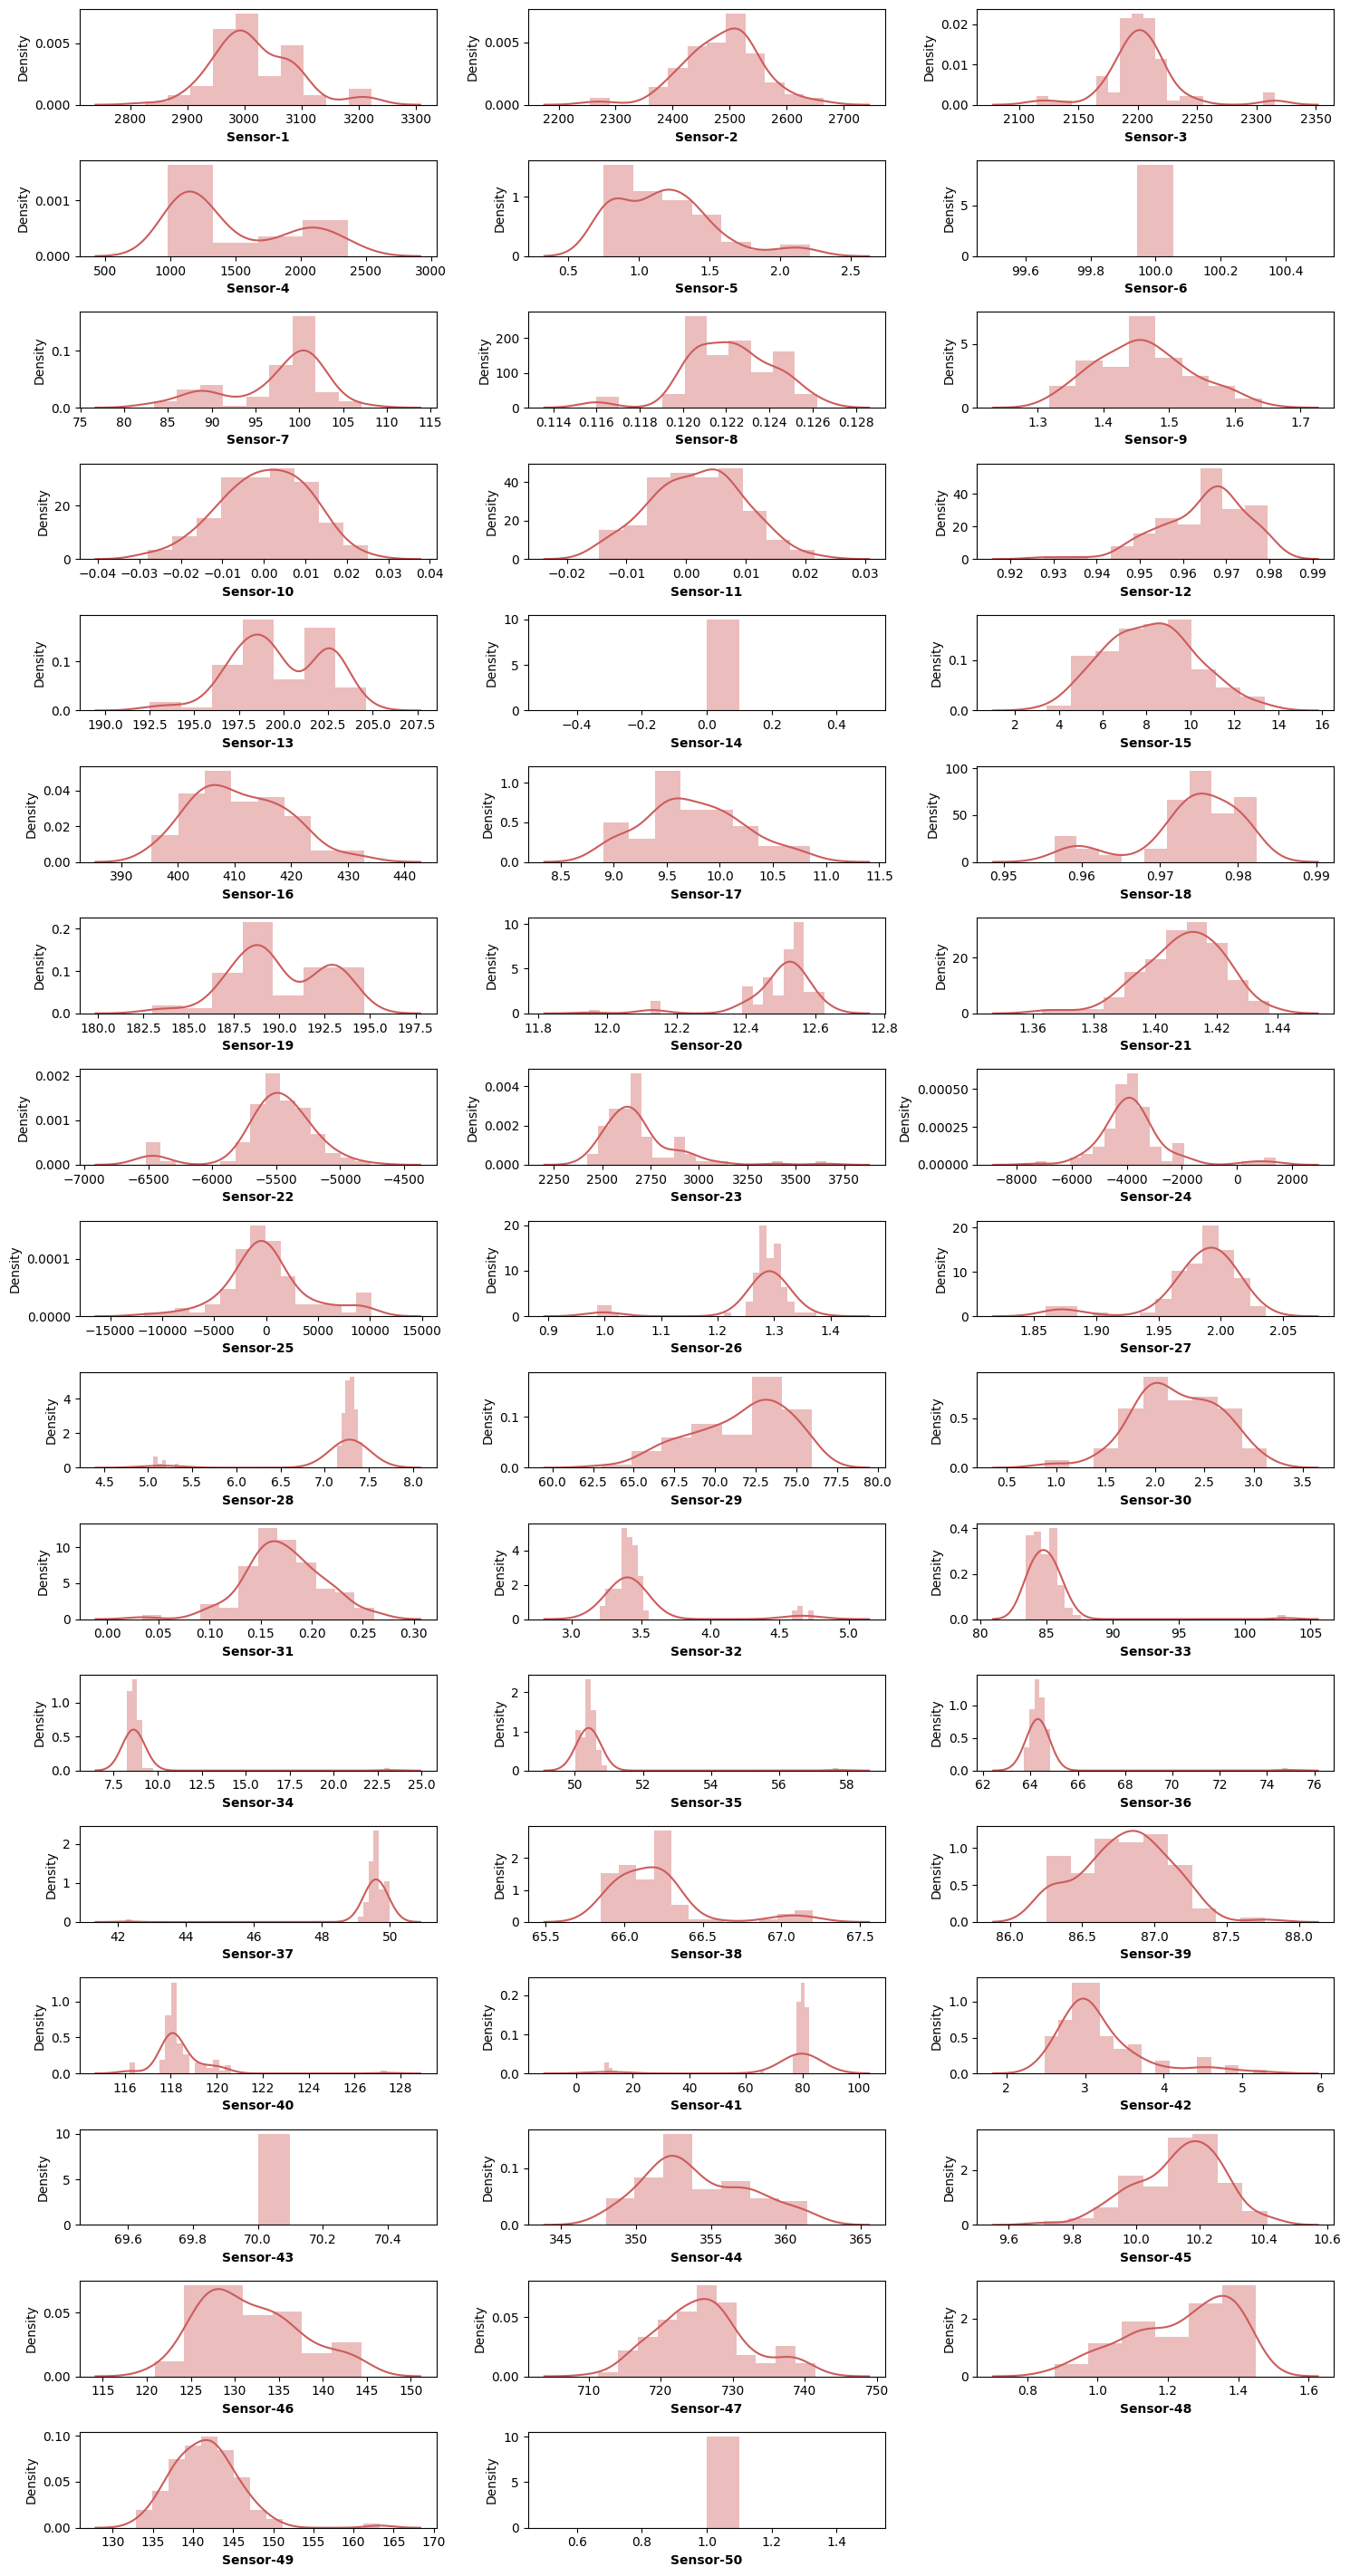

In [14]:
#Distribution of first 50 sensors
plt.figure(figsize = (15,100))

for i,col in enumerate(wafers.columns[1:51]):
    plt.subplot(60, 3, i+1)
    sns.distplot(x = wafers[col], color = 'indianred')
    plt.xlabel(col, weight = 'bold')
    plt.tight_layout()

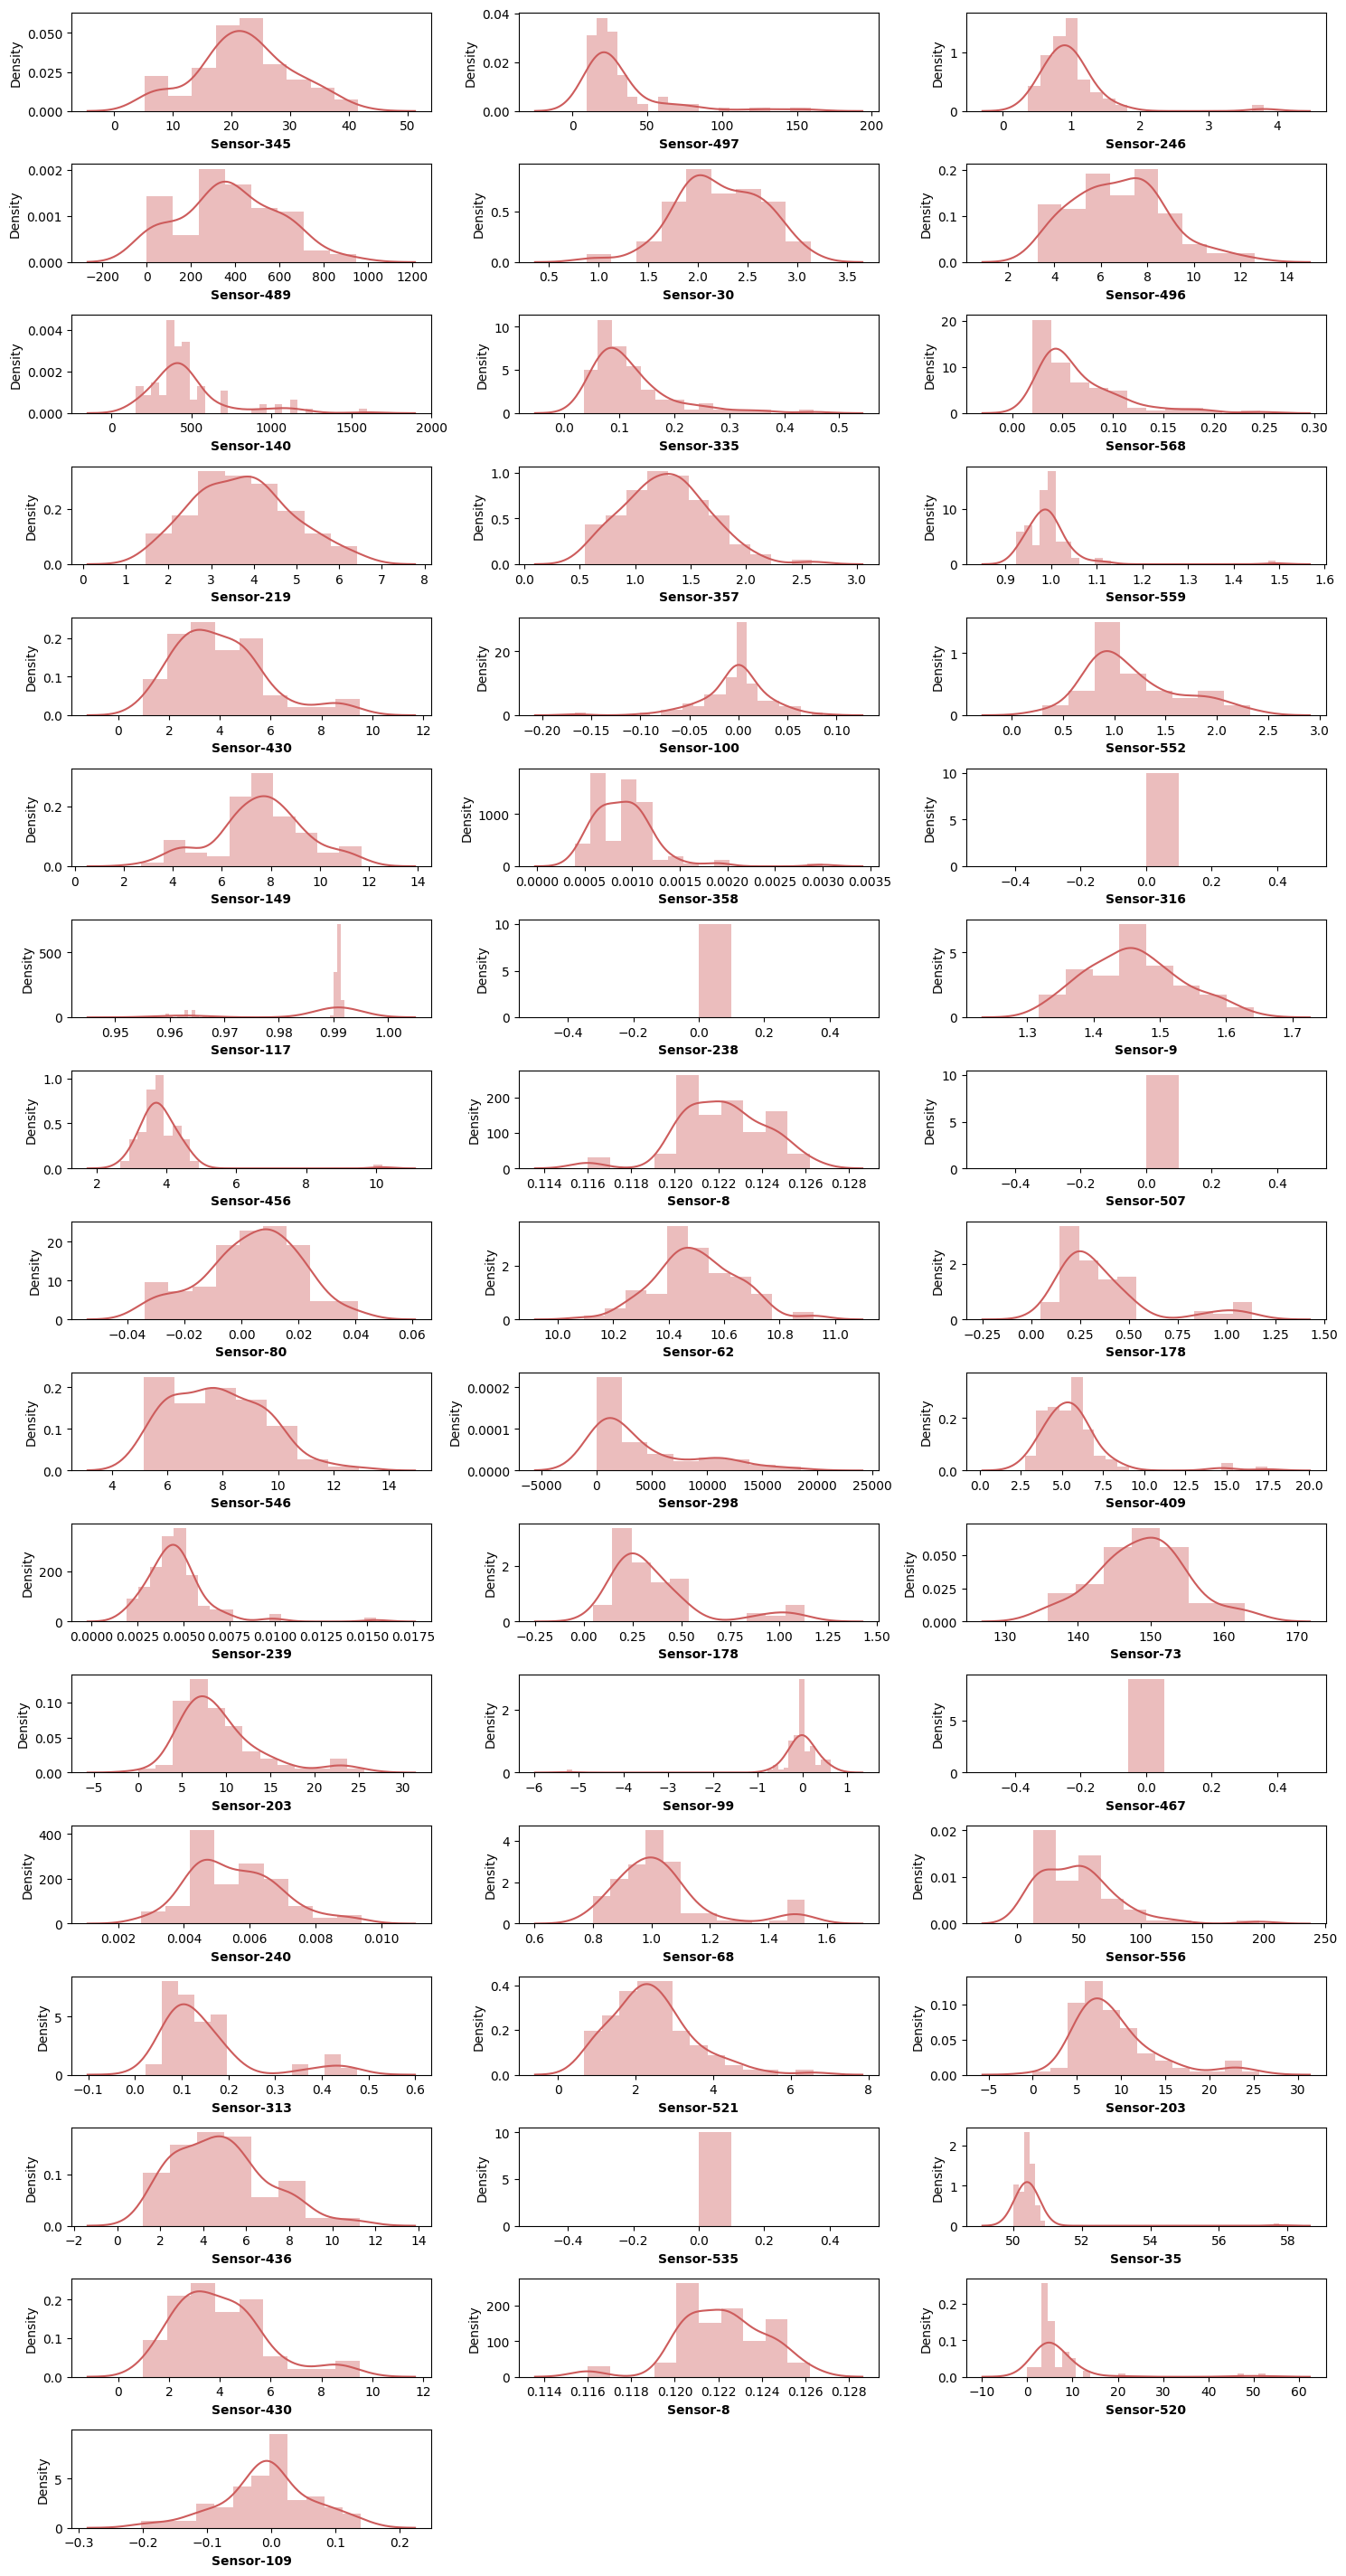

In [15]:
# Select 50 random sensors

random_50_sensors_idx = []
for i in range(50):
    if i not in random_50_sensors_idx:
        random_50_sensors_idx.append(np.random.randint(1, 591))

# let's now, have a look at the distribution of random 50 sensors
plt.figure(figsize=(15, 100))

for i, col in enumerate(wafers.columns[random_50_sensors_idx]):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=wafers[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [23]:
def get_cols_with_zero_std_dev(df: pd.DataFrame):
    """
    Returns a list of columns names who are having zero standard deviation.
    """
    cols_to_drop = []
    num_cols = [col for col in df.columns if df[col].dtype != 'O']  # numerical cols only
    for col in num_cols:
        if df[col].std() == 0:
            cols_to_drop.append(col)
    return cols_to_drop

def get_redundant_cols(df: pd.DataFrame, missing_thresh=.7):
    """
    Returns a list of columns having missing values more than certain thresh.
    """
    cols_missing_ratios = df.isna().sum().div(df.shape[0])
    cols_to_drop = list(cols_missing_ratios[cols_missing_ratios > missing_thresh].index)
    return cols_to_drop

In [24]:
## Columns w missing vals more than 70%

cols_to_drop_1 = get_redundant_cols(wafers, missing_thresh=.7)
cols_to_drop_1

['Sensor-158', 'Sensor-159', 'Sensor-293', 'Sensor-294']

In [25]:
## Columns w 0 Standard Deviation

cols_to_drop_2 = get_cols_with_zero_std_dev(df=wafers)
cols_to_drop_2.append("Wafer")
cols_to_drop_2

['Sensor-6',
 'Sensor-14',
 'Sensor-43',
 'Sensor-50',
 'Sensor-53',
 'Sensor-70',
 'Sensor-75',
 'Sensor-98',
 'Sensor-142',
 'Sensor-150',
 'Sensor-179',
 'Sensor-180',
 'Sensor-187',
 'Sensor-190',
 'Sensor-191',
 'Sensor-192',
 'Sensor-193',
 'Sensor-194',
 'Sensor-195',
 'Sensor-207',
 'Sensor-210',
 'Sensor-227',
 'Sensor-230',
 'Sensor-231',
 'Sensor-232',
 'Sensor-233',
 'Sensor-234',
 'Sensor-235',
 'Sensor-236',
 'Sensor-237',
 'Sensor-238',
 'Sensor-241',
 'Sensor-242',
 'Sensor-243',
 'Sensor-244',
 'Sensor-257',
 'Sensor-258',
 'Sensor-259',
 'Sensor-260',
 'Sensor-261',
 'Sensor-262',
 'Sensor-263',
 'Sensor-264',
 'Sensor-265',
 'Sensor-266',
 'Sensor-267',
 'Sensor-277',
 'Sensor-285',
 'Sensor-314',
 'Sensor-315',
 'Sensor-316',
 'Sensor-323',
 'Sensor-326',
 'Sensor-327',
 'Sensor-328',
 'Sensor-329',
 'Sensor-330',
 'Sensor-331',
 'Sensor-343',
 'Sensor-348',
 'Sensor-365',
 'Sensor-370',
 'Sensor-371',
 'Sensor-372',
 'Sensor-373',
 'Sensor-374',
 'Sensor-375',
 'Se

In [26]:
## Cols to drop
cols_to_drop = cols_to_drop_1 + cols_to_drop_2

In [27]:
# Columns to drop
cols_to_drop = ['wafers']
## Separate features and Labels out
X, y = wafers.drop(cols_to_drop, axis=1), wafers[["Good/Bad"]]

In [28]:
## Dependent feature variables
print("Shape of the features now: ", X.shape)
X.head()

Shape of the features now:  (100, 591)


,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,Sensor-12,Sensor-13,Sensor-14,Sensor-15,Sensor-16,Sensor-17,Sensor-18,Sensor-19,Sensor-20,Sensor-21,Sensor-22,Sensor-23,Sensor-24,Sensor-25,Sensor-26,Sensor-27,Sensor-28,Sensor-29,Sensor-30,Sensor-31,Sensor-32,Sensor-33,Sensor-34,Sensor-35,Sensor-36,Sensor-37,Sensor-38,Sensor-39,Sensor-40,Sensor-41,Sensor-42,Sensor-43,Sensor-44,Sensor-45,Sensor-46,Sensor-47,Sensor-48,Sensor-49,Sensor-50,...,Sensor-542,Sensor-543,Sensor-544,Sensor-545,Sensor-546,Sensor-547,Sensor-548,Sensor-549,Sensor-550,Sensor-551,Sensor-552,Sensor-553,Sensor-554,Sensor-555,Sensor-556,Sensor-557,Sensor-558,Sensor-559,Sensor-560,Sensor-561,Sensor-562,Sensor-563,Sensor-564,Sensor-565,Sensor-566,Sensor-567,Sensor-568,Sensor-569,Sensor-570,Sensor-571,Sensor-572,Sensor-573,Sensor-574,Sensor-575,Sensor-576,Sensor-577,Sensor-578,Sensor-579,Sensor-580,Sensor-581,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,-0.0279,-0.0040,0.9468,198.1219,0,6.0959,416.5950,9.5431,0.9686,188.5788,12.4349,1.4188,-5349.75,2663.50,-3855.50,10126.6667,1.2650,1.9860,7.3152,75.4333,1.4000,0.1018,3.3376,83.6583,8.5596,50.3882,64.4017,49.6118,66.0405,86.7827,119.4242,79.71,2.849,70,358.1082,10.2528,128.6364,727.6867,1.3467,142.3127,1,...,9.5742,0.1083,0.0104,0.0029,9.6238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9815,0.5123,0.0909,52.1953,265.370,0.7170,5.18,0.2259,2.0235,0.0886,1.9520,31.5069,534.1482,1.6633,10.92,0.2937,3.7983,0.0853,2.0444,17.6552,NaN,NaN,NaN,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,0.0084,0.0062,0.9461,204.6134,0,5.1756,406.3290,10.7168,0.9720,193.8966,12.5531,1.4372,-5714.25,2573.50,-2819.50,-1472.7500,1.3163,2.0110,7.4093,71.3222,1.9889,0.1632,3.4790,86.1155,8.5801,50.2940,64.0748,49.7061,65.8602,86.9331,119.2266,79.31,3.331,70,357.6900,10.4125,120.9055,717.3122,1.4512,150.5109,1,...,10.7691,0.1161,0.0075,0.0021,6.4910,1.4404,412.458,75.006,0.5099,18.56,2.32,0.2269,7.8484,0.8557,35.4007,4.4999,3.0931,0.9811,0.4201,0.0755,42.8218,264.272,0.5671,4.98,0.0877,2.0902,0.0382,1.8844,15.4662,535.9527,2.2638,9.62,0.2673,3.2966,0.0750,1.7949,11.8075,NaN,NaN,NaN,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,0.0138,0.0000,0.9656,199.5093,0,4.8205,414.1385,10.0666,0.9746,189.4428,12.6257,1.4231,-5538.00,2971.75,-4168.50,4729.5000,1.2942,1.9743,7.2903,73.4778,0.8778,0.0341,3.4573,83.7568,8.2981,50.6280,64.6380,49.3720,65.9373,86.6174,119.9514,80.57,3.675,70,358.8255,10.2234,129.1882,729.5739,1.3843,143.5227,1,...,14.0981,0.1081,0.0086,0.0021,7.9861,1.3531,395.638,74.170,0.8341,19.59,1.33,0.3352,8.8260,0.5484,61.6419,4.9515,1.7932,0.9929,0.2454,0.0525,24.7203,266.004,0.8756,11.18,0.1832,4.2535,0.0714,4.2029,20.9204,534.1482,1.6633,10.92,0.2937,3.7983,0.0853,2.0444,17.6552,NaN,NaN,NaN,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,-0.0046,-0.0024,0.9589,199.6262,0,13.3691,411.8383,10.6553,0.9736,188.9709,12.4349,1.4148,-5466.75,2605.50,-5451.25,9022.0000,1.2997,1.9710,7.2818,73.6111,1.5333,0.1423,3.4666,83.8148,8.5720,50.3314,64.2616,49.6686,65.8501,86.8066,119.2172,79.38,2.951,70,358.8382,10.3015,124.7945,722.5888,1.3719,142.3773,1,...,14.0981,0.1068,0.0073,0.0019,6.8280,0.4880,405.192,72.286,0.1530,18.57,0.30,0.0622,8.7596,0.1370,31.3507,4.5830,0.4150,0.9794,0.1459,0.0398,14.8960,264.272,0.5671,4.98,0.0877,2.0902,0.0382,1.8844,15.4662,534.1482,1.6633,10.92,0.2937,3.7983,0.0853,2.0444,17.6552,NaN,NaN,NaN,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,-0.0046,0.0121,0.9674,202.6499,

In [29]:
## Independent/Target Variables

print("Shape of the labels: ", y.shape)
y.head()

Shape of the labels:  (100, 1)


,Good/Bad
0,-1
1,1
2,-1
3,-1
4,-1


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import StandardScaler

imputer = KNNImputer(n_neighbors=3)
preprocessing_pipeline = Pipeline(
    steps=[('Imputer', imputer), ('Scaler', RobustScaler())])
preprocessing_pipeline

Pipeline(steps=[('Imputer', KNNImputer(n_neighbors=3)),
                ('Scaler', RobustScaler())])

In [31]:
## Transform "Wafers" features

X_trans = preprocessing_pipeline.fit_transform(X)
print("Shape of transformed features set: ", X_trans.shape)
X_trans

Shape of transformed features set:  (100, 591)


array([[-0.37110152, -0.21388855,  0.67805794, ...,  0.515625  ,
        -0.40093   ,  0.        ],
       [-0.44644841,  0.15494872, -1.32959552, ...,  0.515625  ,
        -0.40093   ,  2.        ],
       [ 0.70070541,  0.08389967,  0.20530751, ...,  0.515625  ,
        -0.40093   ,  0.        ],
       ...,
       [ 0.83289837, -1.31558137, -1.26792905, ..., -0.671875  ,
        -0.44021198,  0.        ],
       [-0.49988372,  0.59310515, -0.16308229, ..., -0.671875  ,
        -0.44021198,  0.        ],
       [-0.92374874, -0.35561596,  0.40033513, ..., -0.671875  ,
        -0.44021198,  2.        ]])

In [32]:
%pip install kneed

In [33]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
from typing import Tuple
from dataclasses import dataclass


@dataclass
class ClusterDataInstances:
    """Divides the given data instances into different clusters via KMeans Clustering algorithm.

    Args:
        X (np.array): Takes in an array which gotta be clustered.
        desc (str): Description of the said array.
    """
    X: np.array
    desc: str

    def _get_ideal_number_of_clusters(self):
        """Returns the ideal number of clusters the given data instances should be divided into by
        locating the dispersal point in number of clusters vs WCSS plot.

        Raises:
            e: Raises relevant exception should any kinda error pops up while determining the ideal
            number of clusters.

        Returns:
            int: Ideal number of clusters the given data instances should be divided into.
        """
        try:
            print(
                f'Getting the ideal number of clusters to cluster "{self.desc} set" into..')

            ####################### Compute WCSS for shortlisted number of clusters ##########################
            print("computing WCSS for shortlisted number of clusters..")
            wcss = []  # Within Summation of Squares
            for i in range(1, 11):
                kmeans = KMeans(n_clusters=i, init='k-means++',
                                random_state=42)
                kmeans.fit(self.X)
                wcss.append(kmeans.inertia_)
                print(f"WCSS for n_clusters={i}: {kmeans.inertia_}")
            print(
                "WCSS computed successfully for all shortlisted number of clusters!")

            ################### Finalize dispersal point as the ideal number of clusters #####################
            print(
                "Finding the ideal number of clusters (by locating the dispersal point) via Elbow method..")
            knee_finder = KneeLocator(
                range(1, 11), wcss, curve='convex', direction='decreasing')  # range(1, 11) vs WCSS
            print(
                f"Ideal number of clusters to be formed: {knee_finder.knee}")

            return knee_finder.knee
            ...
        except Exception as e:
            print(e)
            raise e

    def create_clusters(self) -> Tuple:
        """Divides the given data instances into the different clusters, they first hand shoud've been divided into
        via offcourse Kmeans Clustering algorithm.

        Raises:
            e: Raises relevant exception should any kinda error pops up while dividing the given data instances into
            clusters.

        Returns:
            (KMeans, np.array): KMeans Clustering object being used to cluster the given data instances and the given dataset
            along with the cluster labels, respectively.
        """
        try:
            ideal_clusters = self._get_ideal_number_of_clusters()
            print(
                f"Dividing the \"{self.desc}\" instances into {ideal_clusters} clusters via KMeans Clustering algorithm..")
            kmeans = KMeans(n_clusters=ideal_clusters,
                            init='k-means++', random_state=42)
            y_kmeans = kmeans.fit_predict(self.X)
            print(
                f"..said data instances divided into {ideal_clusters} clusters successfully!")

            return kmeans, np.c_[self.X, y_kmeans]
            ...
        except Exception as e:
            print(e)
            raise e

In [34]:
## Cluster `Wafer` instances

cluster_wafers = ClusterDataInstances(X=X_trans, desc="wafers features")
clusterer, X_clus = cluster_wafers.create_clusters()
X_clus

Getting the ideal number of clusters to cluster "wafers features set" into..
computing WCSS for shortlisted number of clusters..
WCSS for n_clusters=1: 1503832.7821063097
WCSS for n_clusters=2: 512968.90442063054
WCSS for n_clusters=3: 185963.5295163119
WCSS for n_clusters=4: 151436.3471345478
WCSS for n_clusters=5: 142435.795720062
WCSS for n_clusters=6: 122033.84957292283
WCSS for n_clusters=7: 87945.41502328732
WCSS for n_clusters=8: 75472.95860881645
WCSS for n_clusters=9: 72614.47171883167
WCSS for n_clusters=10: 71451.74932206572
WCSS computed successfully for all shortlisted number of clusters!
Finding the ideal number of clusters (by locating the dispersal point) via Elbow method..
Ideal number of clusters to be formed: 3
Dividing the "wafers features" instances into 3 clusters via KMeans Clustering algorithm..
..said data instances divided into 3 clusters successfully!


array([[-0.37110152, -0.21388855,  0.67805794, ..., -0.40093   ,
         0.        ,  0.        ],
       [-0.44644841,  0.15494872, -1.32959552, ..., -0.40093   ,
         2.        ,  0.        ],
       [ 0.70070541,  0.08389967,  0.20530751, ..., -0.40093   ,
         0.        ,  0.        ],
       ...,
       [ 0.83289837, -1.31558137, -1.26792905, ..., -0.44021198,
         0.        ,  0.        ],
       [-0.49988372,  0.59310515, -0.16308229, ..., -0.44021198,
         0.        ,  0.        ],
       [-0.92374874, -0.35561596,  0.40033513, ..., -0.44021198,
         2.        ,  0.        ]])

In [35]:
## Clusters

np.unique(X_clus[:, -1])

array([0., 1., 2.])

In [36]:
## Configure "Clustered" array along with target features
wafers_clus = np.c_[X_clus, y]

## Cluster_1 data
wafers_1 = wafers_clus[wafers_clus[:, -2] == 0]
wafers_1.shape

(96, 593)

In [37]:
## Cluster_2 data

wafers_clus[wafers_clus[:, -2] == 1].shape

(1, 593)

In [38]:
## Cluster_3 data

wafers_clus[wafers_clus[:, -2] == 2].shape

(3, 593)

In [39]:
%pip install imbalanced-learn

In [40]:
from imblearn.combine import SMOTETomek

X, y = X_trans[:, :-1], y
resampler = SMOTETomek(sampling_strategy="auto")
X_res, y_res = resampler.fit_resample(X, y)

In [41]:
print("Before resampling, Shape of training instances: ", np.c_[X, y].shape)
print("After resampling, Shape of training instances: ", np.c_[X_res, y_res].shape)

Before resampling, Shape of training instances:  (100, 591)
After resampling, Shape of training instances:  (188, 591)


In [42]:
## Target Cats after Resampling

print(np.unique(y_res))
print(f"Value Counts: \n-1: {len(y_res[y_res == -1])}, 1: {len(y_res[y_res == 1])}")

[-1  1]
Value Counts: 
-1: 188, 1: 188


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=1/3, random_state=42)

print(f"train set: {X_train.shape, y_train.shape}")
print(f"test set: {X_test.shape, y_test.shape}")

train set: ((125, 590), (125, 1))
test set: ((63, 590), (63, 1))


In [44]:
%pip install xgboost==0.90

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 MB 5.6 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.1
    Uninstalling xgboost-2.1.1:
      Successfully uninstalled xgboost-2.1.1


In [46]:
# Prepared training sets
X_prep = wafers_1[:, :-2]
y_prep = wafers_1[:, -1]
print(X_prep.shape, y_prep.shape)

(96, 591) (96,)


In [47]:
# Prepared training and test sets

X_prep = X_train
y_prep = y_train
X_test_prep = X_test
y_test_prep = y_test

print(X_prep.shape, y_prep.shape)
print(X_test_prep.shape, y_test_prep.shape)

(125, 590) (125, 1)
(63, 590) (63, 1)


In [48]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

# Shortlisted base Models
svc_clf = SVC(kernel='linear')
svc_rbf_clf = SVC(kernel='rbf')
random_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(objective='binary:logistic')

In [49]:
## A function to display Scores

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [50]:
## SVC Scores

svc_scores = cross_val_score(svc_clf, X_prep, y_prep, scoring='roc_auc', cv=10, verbose=2)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


In [51]:
display_scores(svc_scores)

Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0


In [52]:
## Performance on test set using cross-validation

# Predictions using cross-validation
svc_preds = cross_val_predict(svc_clf, X_test_prep, y_test_prep, cv=5)

# AUC score
svc_auc = roc_auc_score(y_test_prep, svc_preds)
svc_auc

0.9558823529411764

In [53]:
## SVC rbf Scores

svc_rbf_scores = cross_val_score(svc_rbf_clf, X_prep, y_prep, scoring='roc_auc', cv=10, verbose=2)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


In [54]:
display_scores(svc_rbf_scores)

Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0


In [55]:
## Random Forest Scores

random_clf_scores = cross_val_score(random_clf, X_prep, y_prep, scoring='roc_auc', cv=10, verbose=2)

[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.6s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s


In [56]:
display_scores(random_clf_scores)

Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0


In [58]:
## Performance on test set using cross-validation

# Predictions using cross-validation
random_clf_preds = cross_val_predict(random_clf, X_test_prep, y_test_prep, cv=5)

# AUC score
random_clf_auc = roc_auc_score(y_test_prep, random_clf_preds)
random_clf_auc

0.9827586206896552